In [1]:
# Importing the Packages and Machine learning libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [2]:
#Getting the csv file and reading it

df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
print('Number of rows in dataset is {} and number of columns is {}'.format(df.shape[0],df.shape[1]))

Number of rows in dataset is 8124 and number of columns is 23


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

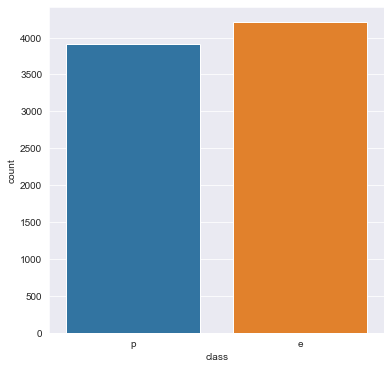

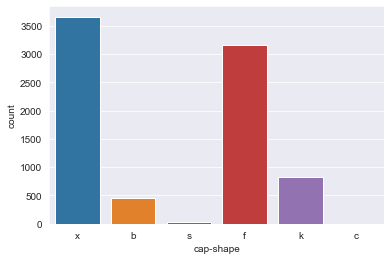

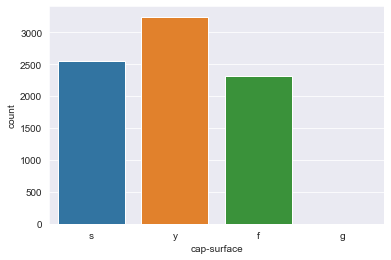

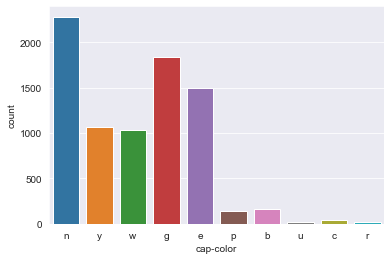

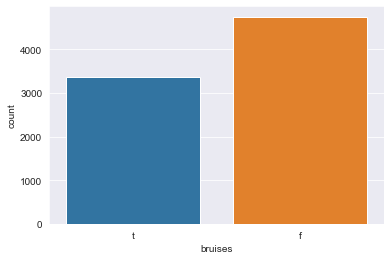

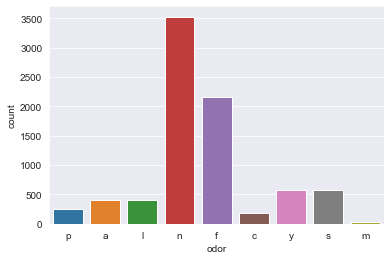

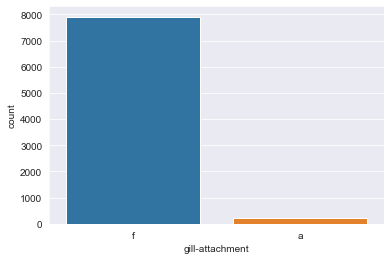

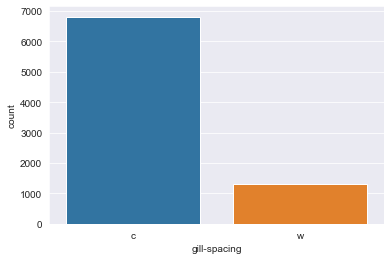

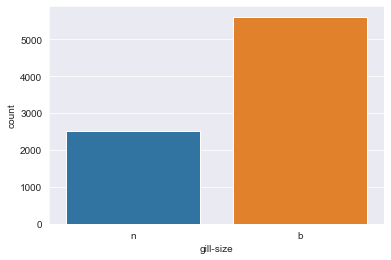

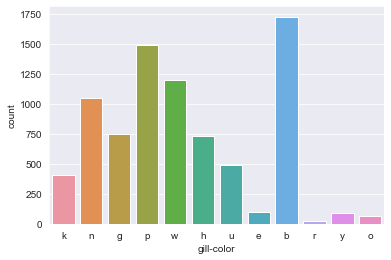

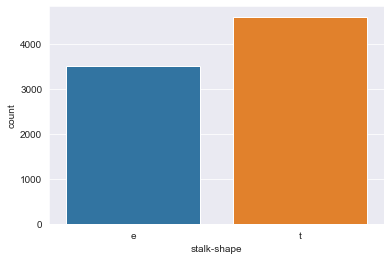

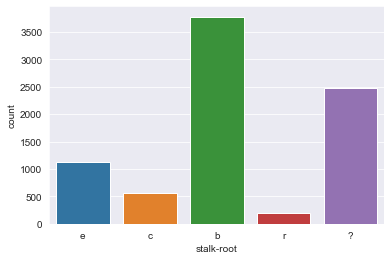

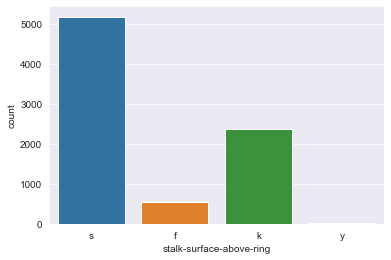

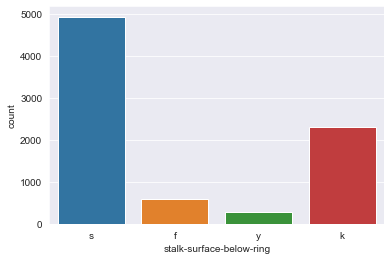

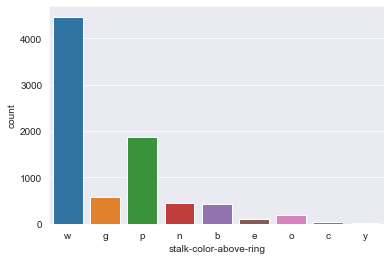

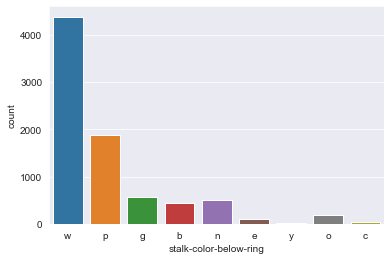

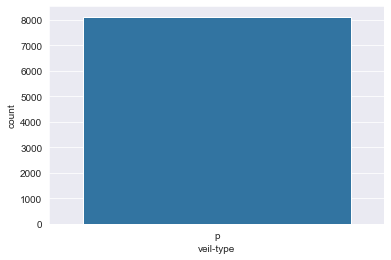

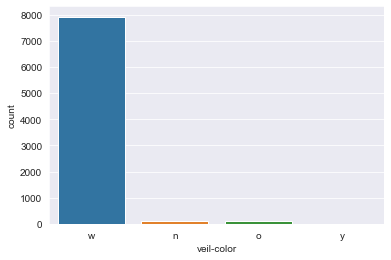

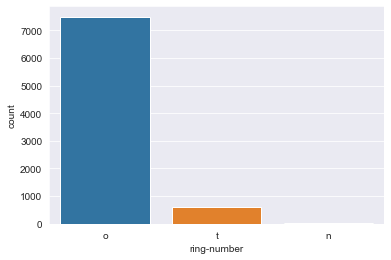

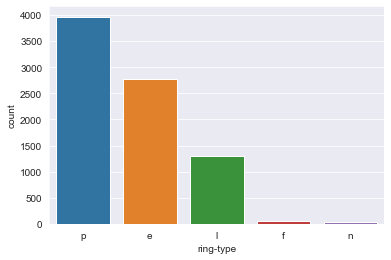

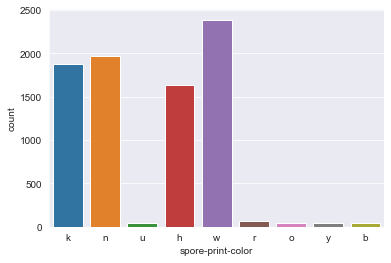

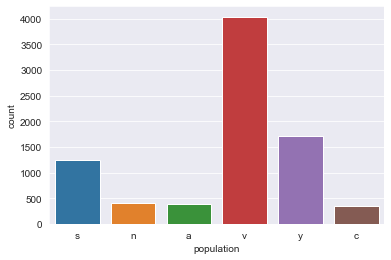

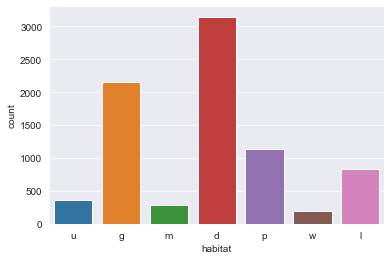

In [5]:
# Visualizing each column to get useful information

plt.figure(figsize=(6, 6))
sns.set_style('darkgrid')
qwerty = list(df.columns)
for column in qwerty:
    sns.countplot(x=column,data=df)
    plt.show()

In [6]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [7]:
# Modifing the target column and changing the categorical value to numerical

y = pd.DataFrame(df["class"])
y.replace("e",0, inplace=True)
y.replace("p",1, inplace=True)
y = y.values.flatten()
y

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [8]:
# Preparing features 

x = df.copy(deep=True)
x.drop("class", axis = 1, inplace = True)
x = pd.get_dummies(x)
x.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
# Splitting the data in train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Random Forest Classifier

In [10]:
# Random_forest_classifier...............1

rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train,y_train)

pred_rf = rf.predict(x_test)

print("Random Forest test set Performance: ")
print("-------------------------------------")
print(accuracy_score(y_test,pred_rf))
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

Random Forest test set Performance: 
-------------------------------------
1.0
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# K Nearest Neighbors

In [11]:
# KNN...............2

kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(x_train, y_train)

pred_kn = kn.predict(x_test)

print("Knn test set Performance: ")
print("---------------------------")
print(accuracy_score(y_test,pred_kn))
print(classification_report(y_test, pred_kn))
cross_val = cross_val_score(estimator=kn, X=x_train, y=y_train)
print(cross_val.mean())
print(confusion_matrix(y_test,pred_kn))

Knn test set Performance: 
---------------------------
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

1.0
[[843   0]
 [  0 782]]
